In [180]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.linalg as linalg
from icecream import ic

In [181]:
X = np.array([1, 3, 4, 2, 5, 6, 7, 2.5, 3.5, 4.5, 5.5])
y = np.array([1, 1, 3, 1, 6, 2, 5, 1, 2, 3, 3])

data_set = np.genfromtxt(fname= r"C:\Users\murat\Desktop\2023F\ENGR421\lab\Lab 02 - Parametric Methods\lab02_data_set.csv", delimiter=",", skip_header=1)
X = data_set[:, 0]
y=data_set[:, 1]

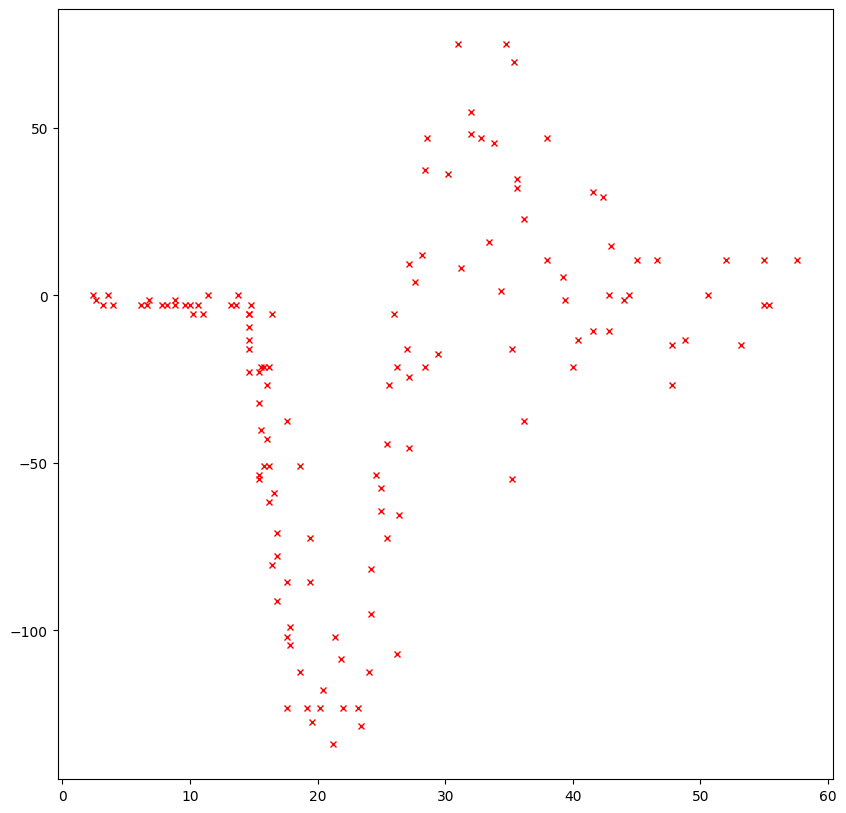

In [182]:
data_interval = np.linspace(start = 0, stop = 60, num = 6001)


plt.figure(figsize = (10, 10))

#Plot points
plt.plot(X, y, "rx", markersize=5)
plt.plot()



plt.show()

### Regression  
**Assumption**: Model is of the form g(x|$\theta$) := w0+w1*x   

**Goal**: Minimize MSE Error := $\sum_{i=1}^{N} (y_i - g(x_i))^2$   



In [183]:
def model(x):
    return -1 + 2*x

In [184]:
def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # Calculating w_1
    w_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    # Calculating w_0
    w_0 = y_mean - w_1 * x_mean
    print("w0: "+str(w_0))
    print("w1: "+str(w_1))

    def model(x):
        return w_0 + x*w_1
    return model

\begin{align*}
\underbrace{\begin{bmatrix} N & \sum\limits_{i = 1}^{N} x_{i}\\ \sum\limits_{i = 1}^{N} x_{i} & \sum\limits_{i = 1}^{N} x_{i}^{2} \end{bmatrix}}_{\mathbf{A}} \underbrace{\begin{bmatrix}w_{0} \\ w_{1} \end{bmatrix}}_{\boldsymbol{w}} &= \underbrace{\begin{bmatrix}\sum\limits_{i = 1}^{N} y_{i} \\ \sum\limits_{i = 1}^{N} y_{i} x_{i} \end{bmatrix}}_{\boldsymbol{b}} \\
\boldsymbol{w} &= \mathbf{A}^{-1} \boldsymbol{b}
\end{align*}

In [185]:
def linear_regression_matrix_form(x, y):
    # calculate A
    N = len(x)
    A = np.array([[N, np.sum(x)],
                [np.sum(x), np.sum(x**2)]])
    ic(A)
    # calculate b
    b = np.array([[np.sum(y)], [np.sum(y * x)]])
    ic(b)

    # calculate w
    w = np.matmul(linalg.cho_solve(linalg.cho_factor(A), np.eye(2)), b)
    ic(w)
    
    def model(x):
        return w[0] + x*w[1]
    return model

\begin{align*}
\underbrace{\begin{bmatrix} N & \sum\limits_{i = 1}^{N} x_{i} & \dots &  \sum\limits_{i = 1}^{N} x_{i}^{K}\\ \sum\limits_{i = 1}^{N} x_{i} & \sum\limits_{i = 1}^{N} x_{i}^{2} & \dots & \sum\limits_{i = 1}^{N} x_{i}^{K + 1}\\ \vdots & \vdots & \ddots & \vdots \\
\sum\limits_{i = 1}^{N} x_{i}^{K} & \sum\limits_{i = 1}^{N} x_{i}^{K + 1} & \dots & \sum\limits_{i = 1}^{N} x_{i}^{2K}\end{bmatrix}}_{\mathbf{A}} \underbrace{\begin{bmatrix}w_{0} \\ w_{1} \\ \vdots \\ w_{K} \end{bmatrix}}_{\boldsymbol{w}} &= \underbrace{\begin{bmatrix}\sum\limits_{i = 1}^{N} y_{i} \\ \sum\limits_{i = 1}^{N} y_{i} x_{i} \\ \vdots \\ \sum\limits_{i = 1}^{N} y_{i} x_{i}^{K} \end{bmatrix}}_{\boldsymbol{b}} \\
\boldsymbol{w} &= \mathbf{A}^{-1} \boldsymbol{b}
\end{align*}

In [186]:
def polynomial_regression(x, y, K):
    # calculate A
    A = np.zeros((K + 1, K + 1))
    for i in range(K + 1):
        for j in range(K + 1):
            A[i, j] = np.sum(x**i * x**j)

    # calculate b
    b = np.zeros((K + 1, 1))
    for i in range(K + 1):
        b[i] = np.sum(y * x**i)

    # calculate w
    w = np.matmul(linalg.cho_solve(linalg.cho_factor(A), np.eye(K + 1)), b)

    ic(w)

    def model(x):
        res = w[0][0]

        for i in range(1, K + 1):
            res += w[i][0] * (x**i)
        return res
    

    return model

In [187]:
model = polynomial_regression(X, y, 11)
model(2)

ic| w: array([[-7.75020775e+02],
              [ 7.04316718e+02],
              [-2.42969888e+02],
              [ 4.25614897e+01],
              [-4.29259621e+00],
              [ 2.67382263e-01],
              [-1.07178671e-02],
              [ 2.81407126e-04],
              [-4.80972183e-06],
              [ 5.15182727e-08],
              [-3.13822497e-10],
              [ 8.28779461e-13]])


-58.55140718230248

In [188]:
def Error(x, y, model):
    for i in range(len(x)):
        print("Diff: " + str((y[i]-model(x[i]))))
    return np.sum((y-model(x))**2)

In [189]:
print(Error(X, y, model))

Diff: -29.652352525003693
Diff: 14.539260859541727
Diff: -7.506665073736713
Diff: 7.498100215615704
Diff: -19.54542309030512
Diff: -12.103648206580218
Diff: -11.306462548421141
Diff: 21.33634250958923
Diff: -3.8628869770267924
Diff: -6.3330669540911915
Diff: 1.2181115649419922
Diff: 8.911225173840702
Diff: -66.89479704032655
Diff: -15.088184462673961
Diff: -21.17021209258141
Diff: 1.6560771093188507
Diff: -25.50364820658021
Diff: 10.016984969768963
Diff: -81.12145896738221
Diff: 14.353925853432155
Diff: 51.19170854142099
Diff: 20.62566480115056
Diff: -15.337023942042563
Diff: 7.218797925207763
Diff: 30.51811156494199
Diff: 3.250019770918879
Diff: -15.023367411155775
Diff: 12.57598127515283
Diff: -24.427688678493723
Diff: -7.107628721286499
Diff: 3.312103386744937
Diff: -24.80591021125153
Diff: 2.2456164694830765
Diff: -35.23077079401482
Diff: -2.511333095154259
Diff: -17.150811150227554
Diff: -1.927635600770003
Diff: 2.4267739772796624
Diff: 39.45001977091888
Diff: -56.76681787225243
D

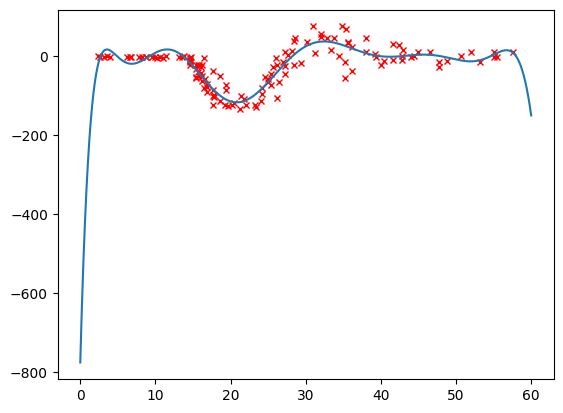

In [190]:
#Plot points
plt.plot(X, y, "rx", markersize=5)
plt.plot()

#Plot model
y_vals = model(data_interval)

plt.plot(data_interval, y_vals)
plt.show()